  ____  __  _  _  ____  ____  _  _  __   
 / ___)(  )( \/ )(  _ \(  __)/ )( \(  ) v2.8.0 
 \___ \ )( / \/ \ ) __/ ) _) ) \/ (/ (_/\ 
 (____/(__)\_)(_/(__)  (__)  \____/\____/

 Created by Marco S. Nobile (m.s.nobile@tue.nl)
 and Simone Spolaor (simone.spolaor@unimib.it)



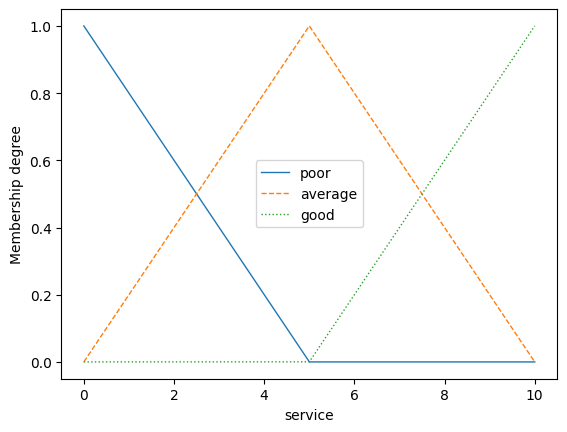

In [24]:
from simpful import *

FS = FuzzySystem()

TLV = AutoTriangle(3, terms=['poor', 'average', 'good'], universe_of_discourse=[0,10])
FS.add_linguistic_variable("service", TLV)
FS.add_linguistic_variable("quality", TLV)

o1 = TriangleFuzzySet(0,0,13,   term="low")
o2 = TriangleFuzzySet(0,13,25,  term="medium")
o3 = TriangleFuzzySet(13,25,25, term="high")
FS.add_linguistic_variable("tip", LinguisticVariable([o1, o2, o3], universe_of_discourse=[0,25]))

FS.add_rules([
	"IF (quality IS poor) OR (service IS poor) THEN (tip IS low)",
	"IF (service IS average) THEN (tip IS medium)",
	"IF (quality IS good) OR (quality IS good) THEN (tip IS high)"
	])

# FS.set_variable("quality", 6.5) 
# FS.set_variable("service", 9.8) 

# tip = FS.inference()
FS.plot_variable("quality")

In [12]:
for quality in range(0, 11, 5):
    for service in range(0, 11, 5):
        FS.set_variable("quality", quality)
        FS.set_variable("service", service)
        tip = FS.inference()
        print("quality: {}, service: {}, tip: {}".format(quality, service, tip))

quality: 0, service: 0, tip: {'tip': 4.324999666949048}
quality: 0, service: 5, tip: {'tip': 10.49165398208161}
quality: 0, service: 10, tip: {'tip': 4.324999666949048}
quality: 5, service: 0, tip: {'tip': 4.324999666949048}
quality: 5, service: 5, tip: {'tip': 12.666666332330985}
quality: 5, service: 10, tip: {'tip': 0}
quality: 10, service: 0, tip: {'tip': 12.33366700033367}
quality: 10, service: 5, tip: {'tip': 14.675012350463685}
quality: 10, service: 10, tip: {'tip': 21.008333000389207}


In [13]:
FS['service'].view()

TypeError: 'FuzzySystem' object is not subscriptable

In [23]:
from simpful import *
# A simple fuzzy inference system for the tipping problem
# Create a fuzzy system object
FS = FuzzySystem()
# Define fuzzy sets and linguistic variables
S_1 = FuzzySet(function=Triangular_MF(a=0, b=0, c=5), term="poor")
S_2 = FuzzySet(function=Triangular_MF(a=0, b=5, c=10), term="good")
S_3 = FuzzySet(function=Triangular_MF(a=5, b=10, c=10), term="excellent")
FS.add_linguistic_variable("Service", LinguisticVariable(
    [S_1, S_2, S_3], concept="Service quality", universe_of_discourse=[0, 10]))

F_1 = FuzzySet(function=Triangular_MF(a=0, b=0, c=10), term="rancid")
F_2 = FuzzySet(function=Triangular_MF(a=0, b=10, c=10), term="delicious")
FS.add_linguistic_variable("Food", LinguisticVariable(
    [F_1, F_2], concept="Food quality", universe_of_discourse=[0, 10]))

# Define output fuzzy sets and linguistic variable
T_1 = FuzzySet(function=Triangular_MF(a=0, b=0, c=10), term="small")
T_2 = FuzzySet(function=Triangular_MF(a=0, b=10, c=20), term="average")
T_3 = FuzzySet(function=Trapezoidal_MF(
    a=10, b=20, c=25, d=25), term="generous")
FS.add_linguistic_variable("Tip", LinguisticVariable(
    [T_1, T_2, T_3], universe_of_discourse=[0, 25]))

# Define fuzzy rules
R1 = "IF (Service IS poor) OR (Food IS rancid) THEN (Tip IS small)"
R2 = "IF (Service IS good) THEN (Tip IS average)"
R3 = "IF (Service IS excellent) OR (Food IS delicious) THEN (Tip IS generous)"
FS.add_rules([R1, R2, R3])
# Set antecedents values
FS.set_variable("Service", 4)
FS.set_variable("Food", 8)

# Perform Mamdani inference and print output
print(FS.Mamdani_inference(["Tip"]))

# Define output crisp values
FS.set_crisp_output_value("small", 5)
FS.set_crisp_output_value("average", 15)

# Define function for generous tip (food score + service score + 5%)
FS.set_output_function("generous", "Food+Service+5")

# Perform Sugeno inference and print output35
print(FS.Sugeno_inference(["Tip"]))


  ____  __  _  _  ____  ____  _  _  __   
 / ___)(  )( \/ )(  _ \(  __)/ )( \(  ) v2.8.0 
 \___ \ )( / \/ \ ) __/ ) _) ) \/ (/ (_/\ 
 (____/(__)\_)(_/(__)  (__)  \____/\____/

 Created by Marco S. Nobile (m.s.nobile@tue.nl)
 and Simone Spolaor (simone.spolaor@unimib.it)

{'Tip': 14.17223614042091}
 * Detected Sugeno model type
{'Tip': 14.777777777777779}
